# Test modules

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sys.path.append("/home/thomas/projects/nilm_at_fair/repository/")

In [3]:
from src.pulsed_power_ml.model_framework.data_io import read_training_files, load_pqsphi_file, load_fft_file, reshape_one_dim_array
from src.pulsed_power_ml.model_framework.visualizations import add_contour_plot, plot_data_point_array
from src.pulsed_power_ml.models.gupta_model.gupta_utils import fit_gaussian_to_peak, gaussian, calculate_background, calculate_feature_vector

In [4]:
x = np.array([15, 30, 45])
y = np.array([20, 27, 18])
a, mu, sigma = fit_gaussian_to_peak(x, y)

/home/thomas/.venv/nilm_at_fair/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


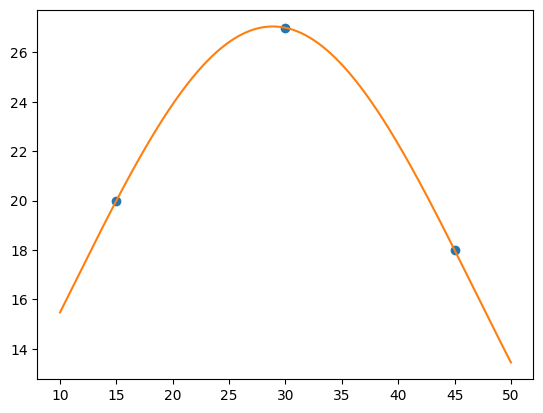

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, 'o')

x_gauss = np.linspace(10, 50, 1000)
y_gauss = gaussian(x_gauss, a, mu, sigma)
ax.plot(x_gauss, y_gauss)

In [6]:
folder = "/home/thomas/projects/nilm_at_fair/training_data/2022-10-25_training_data/tube/"
p_file = "S_LEDOnOff_FFTSize131072"
fft_file = "FFTCurrent_LEDOnOff_FFTSize131072"
fft_size = 2**17

In [7]:
data_point_array = read_training_files(folder, fft_size)

In [8]:
background_vector = data_point_array[100:125, int(2*fft_size/2):int(3*fft_size/2)]

In [9]:
background_vector.shape

(25, 65536)

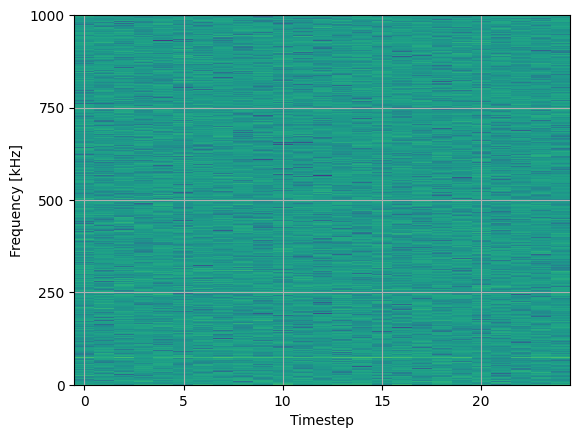

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
ax = add_contour_plot(background_vector,
                      [0, 1_000],
                      ax)

In [11]:
background = calculate_background(background_vector)

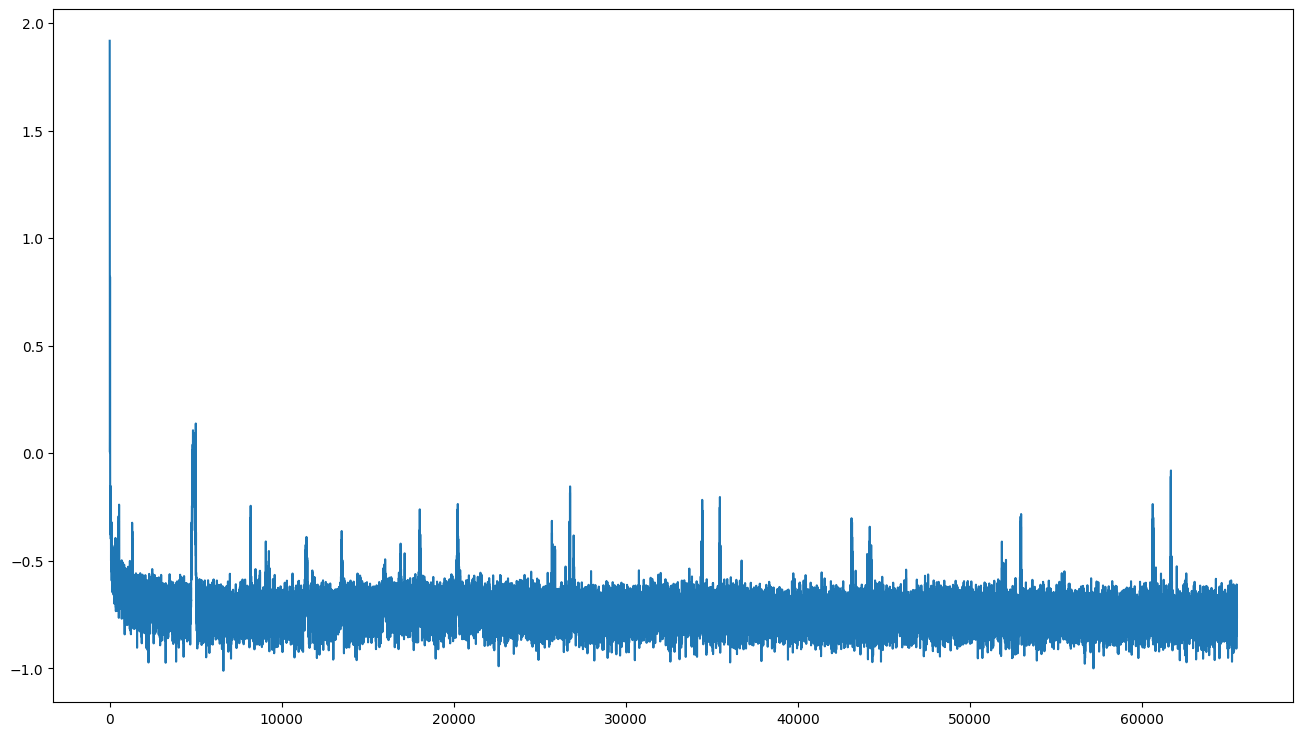

In [12]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.plot(background)

In [13]:
signal = data_point_array[200, int(2*fft_size/2):int(3*fft_size/2)]

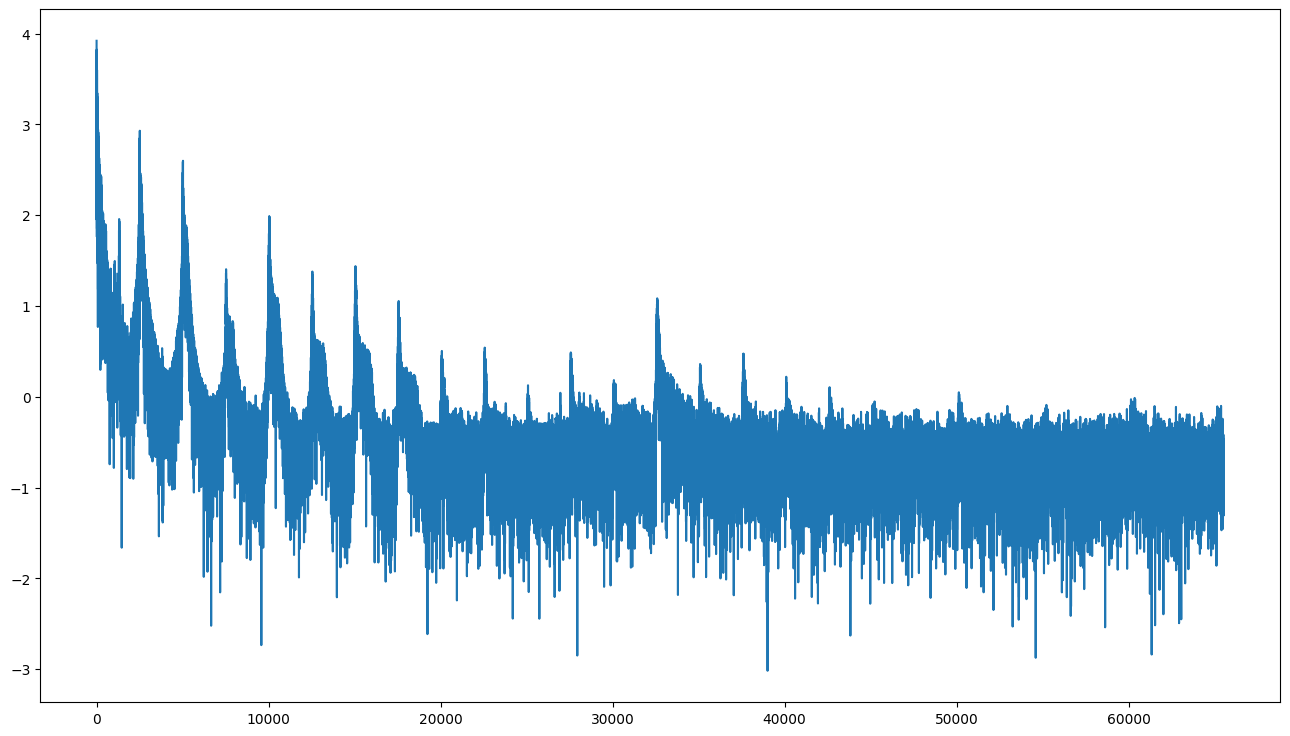

In [14]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.plot(signal)

In [15]:
cleaned_spectrum = signal - background

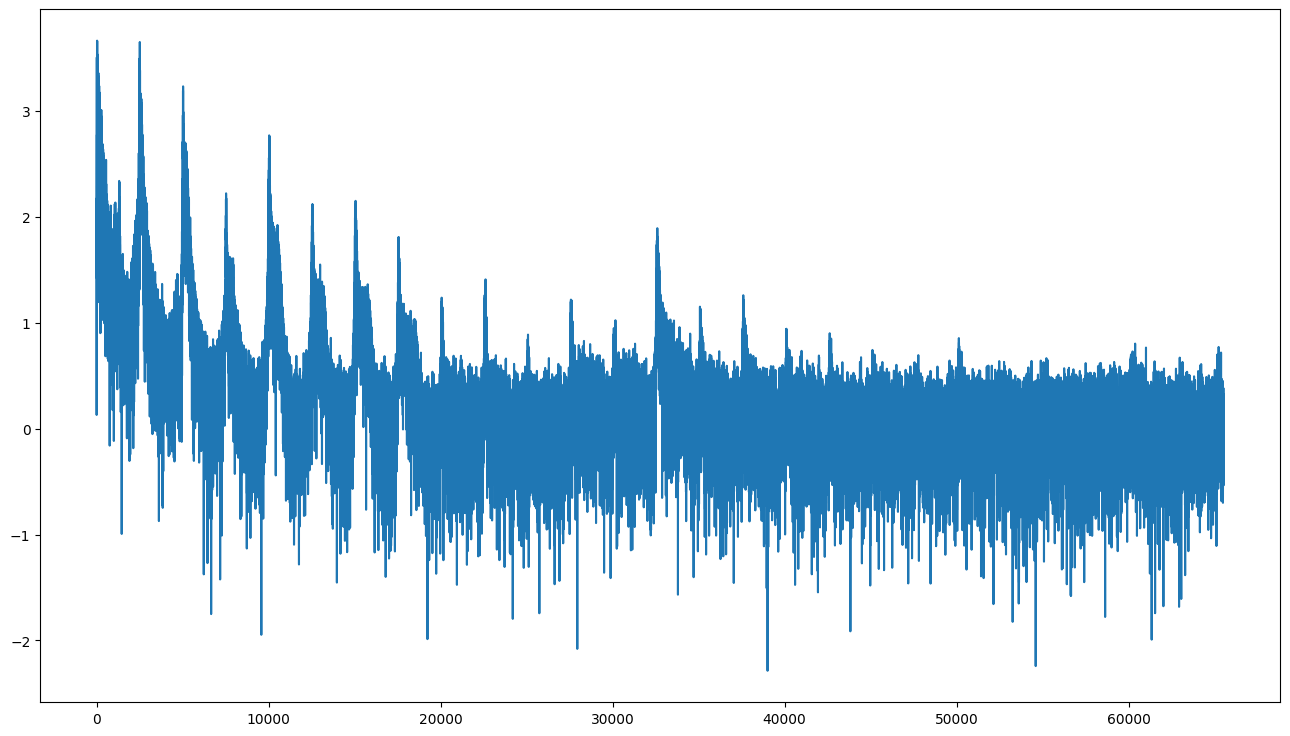

In [16]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.plot(cleaned_spectrum)

In [17]:
feature_vector = calculate_feature_vector(cleaned_spectrum,10,2**16,2_000_000)

In [18]:
feature_vector

array([3.50441442e+00, 4.14426291e+02, 1.83417306e+02, 3.66789679e+00,
       8.20325803e+02, 1.85861434e+02, 3.70229794e+00, 1.00662405e+03,
       9.85481038e+01, 3.55109059e+00, 1.21617533e+03, 1.12607210e+02,
       3.45422053e+00, 1.42522486e+03, 2.41429553e+02, 3.35702537e+00,
       3.22107137e+03, 9.05873157e+01, 3.49551184e+00, 7.64570663e+04,
       1.36540345e+02, 3.65863105e+00, 7.66690847e+04, 8.79910596e+01,
       3.52360920e+00, 7.68653918e+04, 1.07730306e+02, 3.38164282e+00,
       7.70723064e+04, 9.23383434e+01])

In [19]:
feature_vector.shape

(30,)